In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
# Array X dan Y diisi dengan nilai random disini contoh saya menggunakan panjang 8
Sx = np.random.randint(100, size=8) 
Sy = np.random.randint(100, size=8)

label = ['V'+str(x+1) for x in range(8)]
df = pd.DataFrame({"X" : Sx, "Y" : Sy, "Label" : label})
df = df.set_index('Label')
df

,X,Y
Label,,
V1,7,89
V2,49,60
V3,51,17
V4,99,8
V5,20,19
V6,81,92
V7,12,3
V8,36,59


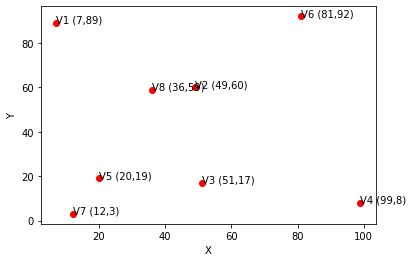

In [119]:
# Membuat plot
plt.plot(Sx, Sy, 'ro')
plt.ylabel('Y')
plt.xlabel('X')
for i in range(len(Sx)):
    plt.text(Sx[i], Sy[i], f"V{i+1} ({Sx[i]},{Sy[i]}) ")
plt.show()

In [110]:
def solusi(x, y):
    S = list(zip(x, y)) # Menghasilkan List yang berisi tuple [(x0,y0),..,(xn,yn)]
    Sx = sorted(S, key=lambda x: x[0])  # Mengurutkan List/array berdasarkan sumbu X
    Sy = sorted(S, key=lambda x: x[1])  # Mengurutkan List/array berdasarkan sumbu X
    titik1, titik2, jarak = closest_pair(Sx, Sy)  # Fungsi rekursif Divide and Conquer
    return titik1,titik2,jarak

In [105]:
def closest_pair(Sx, Sy):
    panjangSx = len(Sx)
    if panjangSx <= 3:
        return bruteForce(Sx)  # melakukan bruteforce untuk perbandingannya
    mid = panjangSx // 2  # Division without remainder, need int
    kiriX = Sx[:mid]  # Dibagi menjadi 2 bagian
    kananX = Sx[mid:]
    # Menentukan titik tengah pada sumbu X
    titikTengah = Sx[mid][0]  
    kiriY = list()
    kananY = list()
    for x in Sy:  # Membagi Sy menjadi 2 array menggunakan titik tengah
        if x[0] <= titikTengah:
           kiriY.append(x)
        else:
           kananY.append(x)
    # Memanggil 2 array secara rekursif setelah dibagi
    (p1, q1, jarak1) = closest_pair(kiriX, kiriY)
    (p2, q2, jarak2) = closest_pair(kananX, kananY)
    # Menentukan jarak terdekat antara dua titik array
    if jarak1 <= jarak2:
        jarak = jarak1
        mn = (p1, q1)
    else:
        jarak = jarak2
        mn = (p2, q2)
    # Call function to account for points on the boundary
    (p3, q3, jarak3) = closest_split_pair(Sx, Sy, jarak, mn)
    # Menentukan jarak terendah pada array
    if jarak <= jarak3:
        return mn[0], mn[1], jarak
    else:
        return p3, q3, jarak3

In [106]:
def bruteForce(Sx):
    jarak = hitungJarak(Sx[0], Sx[1])
    titik1 = Sx[0]
    titik2 = Sx[1]
    panjangSx = len(Sx)
    if panjangSx == 2:
        return titik1, titik2, jarak
    for i in range(panjangSx-1):
        for j in range(i + 1, panjangSx):
            if i != 0 and j != 1:
                jarak2 = hitungJarak(Sx[i], Sx[j])
                if jarak2 < jarak:
                    jarak = jarak2
                    titik1, titik2 = Sx[i], Sx[j]
    return titik1, titik2, jarak

In [107]:
import math
def hitungJarak(titik1, titik2):
    return math.sqrt((titik1[0] - titik2[0]) ** 2 + (titik1[1] - titik2[1]) ** 2)

In [108]:
def closest_split_pair(Sx, Sy, jrk, best_pair):
    panjangSx = len(Sx)
    midSx = Sx[panjangSx // 2][0]  # Memilih titik tengah dari array Sx
    # Membuat subarray yang berisi titik2 yang tidak jauh dari jrk
    # Titik tengah dari Sx
    S2y = [x for x in Sy if midSx - jrk <= x[0] <= midSx + jrk]
    best = jrk
    panjangSy = len(Sy)
    for i in range(panjangSy - 1):
        for j in range(i+1, min(i + 7, panjangSy)):
            p, q = Sy[i], Sy[j]
            jarak = hitungJarak(p, q)
            if jarak < best:
                best_pair = p, q
                best = jarak
    return best_pair[0], best_pair[1], best

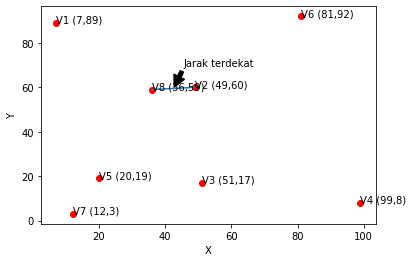

Nilai jarak : 13.038404810405298


In [129]:
titik1, titik2, jarak = solusi(Sx,Sy)
# Membuat garis jarak pada titik terdekat
plt.plot(Sx, Sy, 'ro')
plt.ylabel('Y')
plt.xlabel('X')
for i in range(len(Sx)):
    plt.text(Sx[i], Sy[i], f"V{i+1} ({Sx[i]},{Sy[i]}) ")
plt.plot([titik1[0], titik2[0]], [titik1[1], titik2[1]])
plt.annotate('Jarak terdekat', 
             xy=(((titik1[0]+titik2[0])/2), ((titik1[1]+titik2[1])/2)),
             xytext=(((titik1[0]+titik2[0])/2)+3, ((titik1[1]+titik2[1])/2)+10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.show()
print(f'Nilai jarak : {jarak}')